<a href="https://colab.research.google.com/github/DivyaDarshini-21/Movie-Recommender-System/blob/main/Movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
credits = pd.read_csv("/content/gdrive/MyDrive/Data/Recommender_System/TMDB_5000_Movies_Dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/gdrive/MyDrive/Data/Recommender_System/TMDB_5000_Movies_Dataset/tmdb_5000_movies.csv")

The **credits dataset** contains the following features:-

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.






The **movies dataset** has the following features:-




 id   -   This is infact the movie_id as in the first dataset


budget - The budget in which the movie was made.



genre - The genre of the movie, Action, Comedy ,Thriller etc.


homepage - A link to the homepage of the movie.


keywords - The keywords or tags related to the movie.


original_language - The language in which the movie was made.


original_title - The title of the movie before translation or adaptation.


overview - A brief description of the movie.


popularity - A numeric quantity specifying the movie popularity.


production_companies - The production house of the movie.


production_countries - The country in which it was produced.


release_date - The date on which it was released.


revenue - The worldwide revenue generated by the movie.


runtime - The running time of the movie in minutes.


status - "Released" or "Rumored".


tagline - Movie's tagline.


title - Title of the movie.


vote_average - average ratings the movie recieved.


vote_count - the count of votes recieved.

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


Recommendation engines are of three kinds:

**popularity-based engines** : usually the most simple to implement be also the most impersonal


**content-based engines** : the recommendations are based on the description of the products


**collaborative filtering engines** : records from various users provide recommendations based on user similarities

In [5]:
#Let's join the two dataset on the 'id' column

credits.columns = ['id','tittle','cast','crew']

df_final= movies.merge(credits,on='id')

In [6]:
df_final.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
print('Shape:',df_final.shape)
#__________________________________________
# info on variable types and filling factor
tab_info=pd.DataFrame(df_final.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_final.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(df_final.isnull().sum()/df_final.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

Shape: (4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
column type,int64,object,object,int64,object,object,object,object,float64,object,...,float64,object,object,object,object,float64,int64,object,object,object
null values,0,0,3091,0,0,0,0,3,0,0,...,2,0,0,844,0,0,0,0,0,0
null values (%),0.0,0.0,64.355611,0.0,0.0,0.0,0.0,0.062461,0.0,0.0,...,0.041641,0.0,0.0,17.572351,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
 import json
 json_columns = ['genres', 'keywords', 'production_countries','production_companies', 'spoken_languages']
 for column in json_columns:
#df_final[column] = df_final[column].apply(json.dumps) #json.dumps take a dictionary as input and returns a string as output.

   df_final[column] = df_final[column].apply(json.loads) #json.loads take a string as input and returns a dictionary as output


1.1 **Keywords**


To develop the recommendation engine....... we use of the keywords that describe the films.

 Indeed, a basic assumption is that .......*films described by similar keywords should have similar contents*.
 
  Hence, we can have a close look at the way keywords are defined and as a first step, I quickly characterize what's already in there. 
  
  To do so, let's first list the keywords which are in the dataset

In [9]:
df_final['keywords'].head()

0    [{'id': 1463, 'name': 'culture clash'}, {'id':...
1    [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
2    [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...
3    [{'id': 849, 'name': 'dc comics'}, {'id': 853,...
4    [{'id': 818, 'name': 'based on novel'}, {'id':...
Name: keywords, dtype: object

In [10]:
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

In [11]:
set_keywords = set()
df_final['keywords'] = df_final['keywords'].apply(pipe_flatten_names)
for list_keywords in df_final['keywords'].str.split('|').values:
    if isinstance(list_keywords, float): 
      continue  # only happen if liste_keywords = NaN
      
    set_keywords = set_keywords.union(list_keywords)

# remove null chain entry
set_keywords.remove('')

In [12]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste:
       keyword_count[s] = 0
    for list_keywords in df[ref_col].str.split('|'):        
        if type(list_keywords) == float and pd.isnull(list_keywords): 
          continue        
        for s in [s for s in list_keywords if s in liste]: 
            if pd.notnull(s): 
              keyword_count[s] += 1
  
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [13]:
keyword_occurences, dum = count_word(df_final, 'keywords', set_keywords)
keyword_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189]]

At this stage, the list of keywords has been created...... and we know the number of times each of them appear in the dataset.

 In fact, this list can be used to have a feeling of the content of the most popular movies. 
 
 A fancy manner to visualize the keywords is to  makes use of the wordcloud package. 
 
 In this kind of representation, all the words are arranged in a figure with sizes that depend on their respective frequencies. 
 
 Instead of a wordcloud, we can use histograms to give the same information. 
 
 This allows to have a figure .....where the keywords are ordered by occurence and most importantly, this gives the number of times they appear, an information that can not be retrieved from the wordcloud representation.
 
  In the following figure, I compare both types of representations:

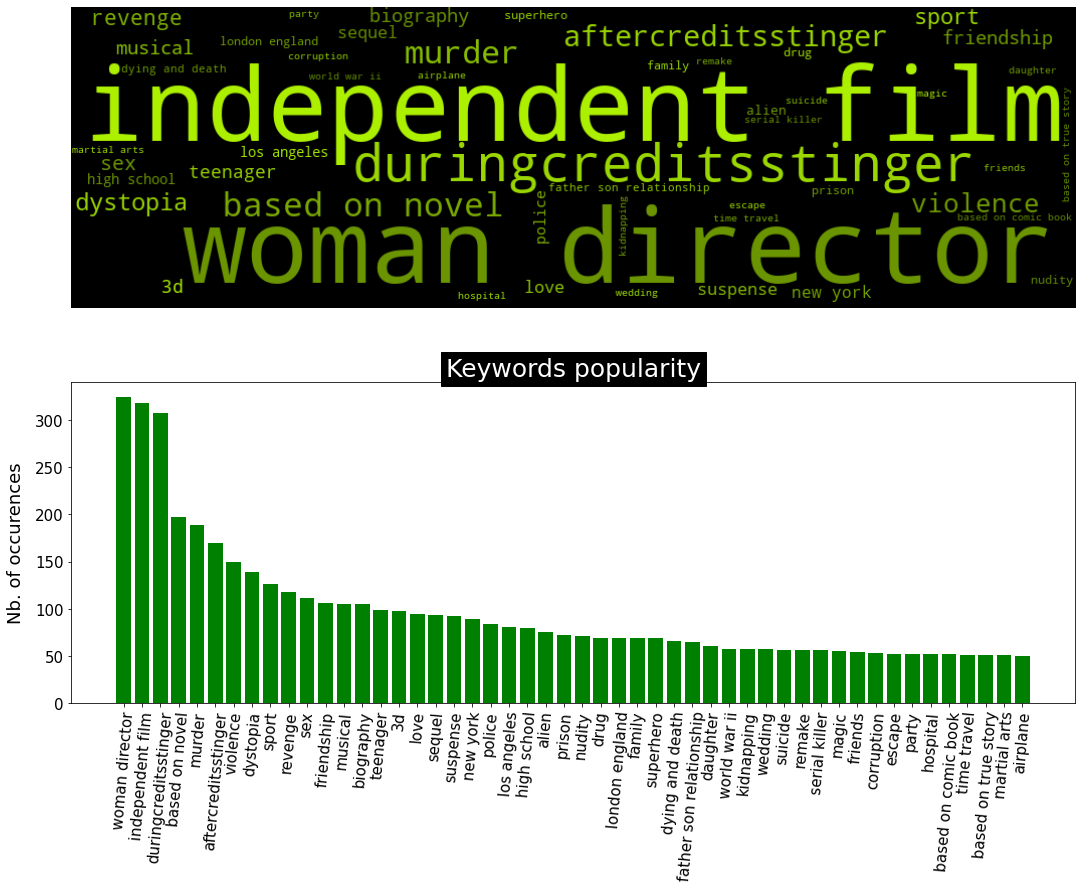

In [14]:

# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#_____________________________________________

# UPPER PANEL: WORDCLOUD
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

#_______________________________________________________
# I define the dictionary used to produce the wordcloud

words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words

#________________________________________________________
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628 , relative_scaling=1 ,
                      color_func = random_color_func,
                      normalize_plurals=False)

wordcloud.generate_from_frequencies(words)

ax1.imshow(wordcloud, interpolation="bilinear")

ax1.axis('off')

#_____________________________________________

# LOWER PANEL: HISTOGRAMS

ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')

plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [15]:
missing_df = df_final.isnull().sum(axis=0).reset_index()

missing_df.columns = ['column_name', 'missing_count']

missing_df['filling_factor'] = (df_final.shape[0] - missing_df['missing_count']) / df_final.shape[0] * 100

missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,overview,3,99.937539
3,runtime,2,99.958359
4,release_date,1,99.979180
5,tittle,0,100.000000
6,vote_count,0,100.000000
7,vote_average,0,100.000000
8,title,0,100.000000
9,status,0,100.000000


Most of the variables are well filled ........since only 2 of them have a filling factor below 93%.

**Genres**




*  The genres variable will surely be important while building the recommendation engines ..........since it describes the content of the film (i.e. Drama, Comedy, Action, ...).
*   

 

To see exactly which genres are the most popular, I use the same approach that  was used for extracting the keywords (hence using similar lines of code), first making a census of the genres

In [16]:
df_final['genres'].head()

0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, dtype: object

In [17]:
genre_labels = set()
df_final['genres'] = df_final['genres'].apply(pipe_flatten_names)
for list_genres in df_final['genres'].str.split('|').values:
    if isinstance(list_keywords, float): 
      continue  # only happen if liste_keywords = NaN

    genre_labels = genre_labels.union(list_genres)
#_________________________
# remove null chain entry
genre_labels.remove('')

In [18]:
keyword_occurences_genres, dum = count_word(df_final, 'genres', genre_labels)
keyword_occurences_genres[:5]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894]]

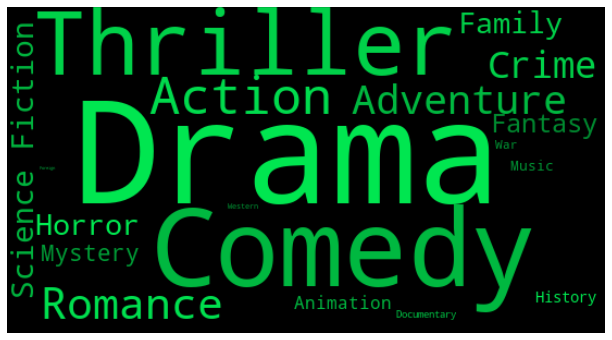

In [19]:
words = dict()

trunc_occurences = keyword_occurences_genres[0:50]

for s in trunc_occurences:
    words[s[0]] = s[1]

tone = 100 # define the color of the words

f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628 , relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)

wordcloud.generate_from_frequencies(words)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()

Number of films per year


The title_year variable indicates when films were released. 

In order to have a global look at the way films are distributed according to this variable..........let's group the films by decades

In [20]:
df_final['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [21]:
df_final['release_date'] = pd.to_datetime(df_final['release_date']).apply(lambda x: x.date())
df_final['title_year'] = pd.to_datetime(df_final['release_date']).apply(lambda x: x.year)
df_final['decade'] = df_final['title_year'].apply(lambda x:((x-1900)//10)*10)

# function that extract statistical parameters from a grouby object:

def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}


# Creation of a dataframe with statitical infos on each decade:
test = df_final['title_year'].groupby(df_final['decade']).apply(get_stats).unstack()

In [22]:
test

,min,max,count,mean
decade,,,,
10.0,1916.0,1916.0,1.0,1916.000000
20.0,1925.0,1929.0,4.0,1927.500000
30.0,1930.0,1939.0,15.0,1935.733333
40.0,1940.0,1949.0,25.0,1944.560000
50.0,1950.0,1959.0,27.0,1954.296296
60.0,1960.0,1969.0,71.0,1965.028169
70.0,1970.0,1979.0,109.0,1974.944954
80.0,1980.0,1989.0,278.0,1984.715827
90.0,1990.0,1999.0,778.0,1996.141388


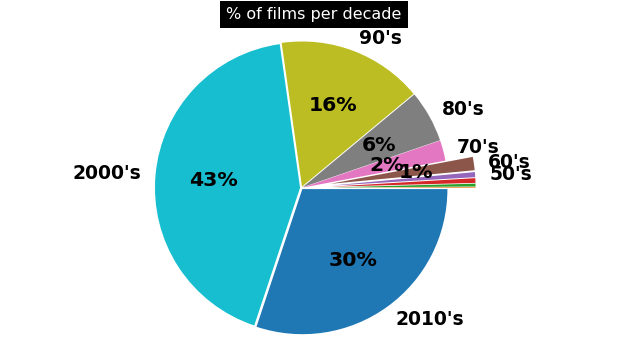

In [23]:
import seaborn as sns

sns.set_context("poster", font_scale=0.85)
#_______________________________
# funtion used to set the labels
def label(s):
    val = (1900 + s, s)[s < 100]
    chain = '' if s < 50 else "{}'s".format(int(val))
    return chain
#____________________________________
plt.rc('font', weight='bold')

f, ax = plt.subplots(figsize=(11, 6))

labels = [label(s) for s in  test.index]

sizes  = test['count'].values

explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]

ax.pie(sizes, explode = explode, labels=labels, autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '', shadow=False, startangle=0)

ax.axis('equal')

ax.set_title('% of films per decade', bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);

df_final.drop('decade', axis=1, inplace = True)

Demographic filtering


Before getting started with this -

1. we need a metric to score or rate movie


2. Calculate the score for every movie


3. Sort the scores and recommend the best rated movie to the users.


We can use the average ratings of the movie ......as the score but using this won't be fair enough...... since a **movie with 8.9 average rating and only 3 votes** cannot be considered better than the **movie with 7.8 as as average rating but 40 votes.**

 So, I'll be using IMDB's weighted rating (wr) which is given as :-

 weighted rating (WR)   =   (v/(v+m)) R  +   (m/(v+m)) C

where,

v      ->           the number of votes for the movie


m       ->          the minimum votes required to be listed in the chart


R       ->         the average rating of the movie

C        ->        the mean vote across the whole report


We already have **v(vote_count)** and **R (vote_average)** and C can be calculated as

In [24]:
df_final.shape

(4803, 24)

In [25]:
df_final.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action,Action|Adventure|Crime,Action|Crime|Drama|Thriller,Action|Adventure|Science Fiction
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,culture clash|future|space war|space colony|so...,ocean|drug abuse|exotic island|east india trad...,spy|based on novel|secret agent|sequel|mi6|bri...,dc comics|crime fighter|terrorist|secret ident...,based on novel|mars|medallion|space travel|pri...
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'Walt Disney Pictures', 'id': 2}]"


In [26]:
C= df_final['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.

The next step is to determine an appropriate value for :

**m**, the minimum votes required to be listed in the chart. 

We will use 90th percentile as our cutoff. 

In other words............... for a movie to feature in the charts, it must have more votes than **at least 90%** of the movies in the list.

In [27]:
m= df_final['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart

In [28]:
q_movies = df_final.copy().loc[df_final['vote_count'] >= m]
q_movies.shape

(481, 24)

In [29]:
q_movies.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action,Action|Adventure|Crime,Action|Crime|Drama|Thriller,Action|Adventure|Science Fiction
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,culture clash|future|space war|space colony|so...,ocean|drug abuse|exotic island|east india trad...,spy|based on novel|secret agent|sequel|mi6|bri...,dc comics|crime fighter|terrorist|secret ident...,based on novel|mars|medallion|space travel|pri...
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'Walt Disney Pictures', 'id': 2}]"


We see that .................there are 481 movies which qualify to be in this list. 

Now, we need to calculate our metric for each qualified movie. 

To do this, we will define a function........ weighted_rating() and define a new feature **score**..... of which we'll calculate the value....... by applying this function to our DataFrame of qualified movies

In [30]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [31]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally....... let's sort the DataFrame based on the **score** feature and output the 

title 

vote count 

vote average 
 
weighted rating or score of the top 10 movies.

In [32]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


We have made the first(though very basic) recommender. 

Under the **Trending Now** tab of these systems......... we find movies that are very popular........ and they can just be obtained by sorting the dataset by the popularity column

Text(0.5, 1.0, 'Popular Movies')

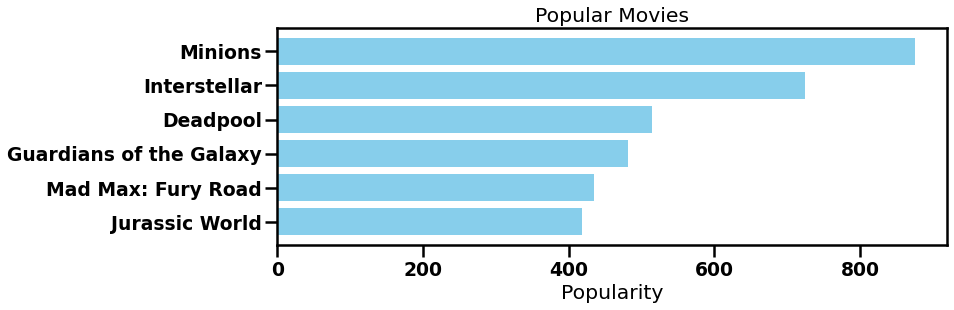

In [33]:
pop= df_final.sort_values('popularity', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6) , pop['popularity'].head(6) , align='center', color='skyblue')

plt.gca().invert_yaxis()

plt.xlabel("Popularity")

plt.title("Popular Movies")

 These demographic recommender systems provide a general chart of recommended movies to all the users. 
 
They are not sensitive to the interests and tastes of a particular user. 
 
This is when we move on to a more refined system - 
 Content Basesd Filtering.

Content Based Filtering

Content-Based recommender system tries to guess the features or behavior of a user given the item’s features, he/she reacts positively to.

Content-based filtering does not require other users' data during recommendations to one user


In this recommender system..... the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. 

Then the movies that are most likely to be similar are recommended.

Example : If  I watch the **Supernatural TV show**, it contains the **‘terror’** and **‘comedy’** tags...........so the algorithm will recommend similar tagged content, like the TV show **Lucifer**.

**Plot description based Recommender**


We will compute **pairwise similarity scores** for all movies based on their ***plot descriptions*** and recommend movies based on that similarity score. 

The plot description is given in the **overview** feature of our dataset. 

Let's take a look at the data. ..

In [34]:
df_final['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

 We need to convert the word vector of each overview. 
 
 Now we'll compute **Term Frequency-Inverse Document Frequency (TF-IDF)** vectors for each overview.

**term frequency -> the relative frequency of a word in a document and is given as (term instances/total instances)**.

 **Inverse Document Frequency  -> the relative count of documents containing the term is given as log(number of documents/documents with term)**
 
  The overall importance of each word to the documents in which they appear is equal to TF * IDF

  TF-IDF is the product of term frequency and inverse document frequency. 
  
  It gives more importance to the word that is rare in the corpus and common in a document.


This will give you a matrix where : 

each **column** represents **a word in the overview vocabulary** (all the words that appear in at least one document)  

each **row** represents a **movie**, as before.

This is done to reduce the importance of words that occur frequently in plot overviews ............ and therefore, their significance in computing the final similarity score.

**TF-IDF Matrix example from Vaibhav Jayaswal’s blog:**

There are two documents in a corpus:

 Text A and Text B. 
 
 We will use them to create a TF-IDF matrix.

Text A: *Jupiter is the largest planet*


Text B: *Mars is the fourth planet from the sun*


The table below shows the values of TF for A and B , IDF, and TFIDF for A and B.

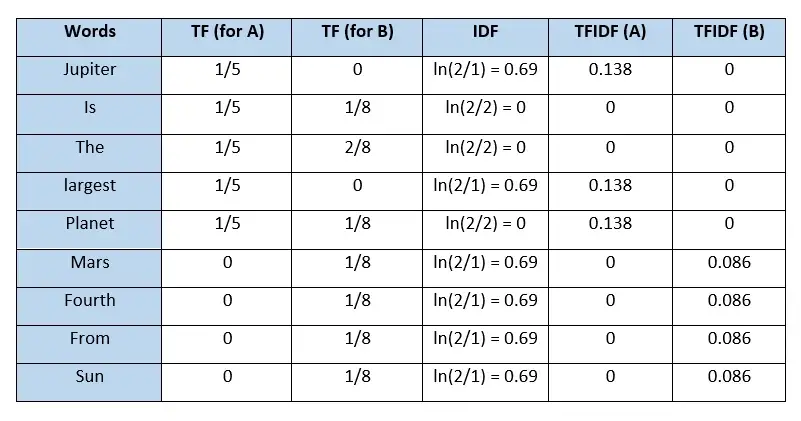

After applying TFIDF .......... text in A and B documents can be represented as a TFIDF vector of dimension equal to the vocabulary words.

 The value corresponding to each word ........ represents the importance of that word in a particular document.

 Scikit-learn gives you a built-in **TfIdfVectorizer class** that produces the TF-IDF matrix in a couple of lines. 

In [35]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. 
#Remove all english stop words such as 'the', 'a'

tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df_final['overview'] = df_final['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_final['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that ........over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. 

There are several candidates for this... such as : 

 The Euclidean

 The Pearson and 

 the Cosine similarity scores. 
 
 There is no right answer to which score is the best. 
 
 Different scores work well in different scenarios .....and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. 

We use the cosine similarity score ........ since it is independent of magnitude and is relatively easy and fast to calculate. 

Mathematically, it is defined as follows:

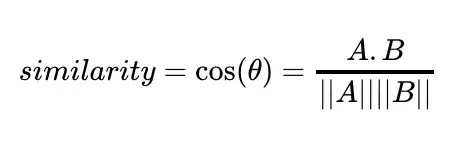


Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 

Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

**LINEAR KERNEL**

Most of text classification problems are linearly separable

The linear kernel is good when there is a lot of features.
That's because mapping the data to a higher dimensional space does not really improve the performance.

In text classification, both the numbers of instances (document) and features (words) are large.

Training a SVM with a linear kernel is faster than with another kernel. 

When you train a SVM with a linear kernel, you only need to optimize the C regularization parameter.  

When training with other kernels, you also need to optimize the γ parameter which means that performing a grid search will usually take more time.



In [36]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function .......that takes in a **movie title** as an input and outputs a list of the **10 most similar movies**. 

Firstly, for this .......  we need a reverse mapping of movie titles and DataFrame indices. 

In other words, we need a mechanism ....to identify the index of a movie in our metadata DataFrame........... given its title.

In [37]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df_final.index , index=df_final['title']).drop_duplicates()

In [38]:
indices.head(10)

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
Spider-Man 3                                5
Tangled                                     6
Avengers: Age of Ultron                     7
Harry Potter and the Half-Blood Prince      8
Batman v Superman: Dawn of Justice          9
dtype: int64

We are now in a good position to define our recommendation function. 


These are the following steps we'll follow :-


*  Get the index of the movie ......given its title


*   Get the list of **cosine similarity scores** for that particular movie with all movies.

*    Convert it into a **list of tuples** .......where the first element is its **position** and the second is the **similarity score**.


*   Sort the aforementioned **list of tuples** based on the similarity scores; that is, the second element.

*  Get the top 10 elements of this list.


  Ignore the first element .....as it refers to self (the movie most similar to a particular movie is the movie itself).


*   Return the **titles corresponding to the indices** of the top elements.




In [39]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):

    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_final['title'].iloc[movie_indices]

In [40]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [41]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

Though this system has done a decent job of finding movies with **similar plot descriptions**........ the quality of recommendations is not that great. 

"The Dark Knight Rises" returns all Batman movies...... while it is more likely that the people who liked that movie .....are more inclined to enjoy other Christopher Nolan movies. 

This is something that cannot be captured by the present system

**Credits, Genres and Keywords Based Recommender**


 The quality of our recommender can be increased with the usage of better metadata. 
 
 So we are going to build a recommender based on the following metadata:
 
  the 3 top actors
  
  the director
   
 related genres 
 
 the movie plot keywords.

From the **cast** , **crew** and **keywords** features...... we need to extract the three most important actors, the director and the keywords associated with that movie. 

Right now, our data is present in the form of "stringified" lists.

 We need to convert it into a safe and usable structure

In [42]:
# Get the director's name from the crew feature. If director is not listed, return NaN
import numpy as np 

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [43]:
df_final['crew'] = df_final['crew'].apply(json.loads)
df_final['director'] = df_final['crew'].apply(get_director)

In [44]:
df_final['director'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [45]:
df_final['cast'] = df_final['cast'].apply(json.loads)
df_final['cast'] = df_final['cast'].apply(pipe_flatten_names)
df_final['cast'].head()

0    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
1    Johnny Depp|Orlando Bloom|Keira Knightley|Stel...
2    Daniel Craig|Christoph Waltz|Léa Seydoux|Ralph...
3    Christian Bale|Michael Caine|Gary Oldman|Anne ...
4    Taylor Kitsch|Lynn Collins|Samantha Morton|Wil...
Name: cast, dtype: object

In [46]:
df_final['genres'].head()

0    Action|Adventure|Fantasy|Science Fiction
1                    Adventure|Fantasy|Action
2                      Action|Adventure|Crime
3                 Action|Crime|Drama|Thriller
4            Action|Adventure|Science Fiction
Name: genres, dtype: object

In [47]:
df_final['keywords'].head()

0    culture clash|future|space war|space colony|so...
1    ocean|drug abuse|exotic island|east india trad...
2    spy|based on novel|secret agent|sequel|mi6|bri...
3    dc comics|crime fighter|terrorist|secret ident...
4    based on novel|mars|medallion|space travel|pri...
Name: keywords, dtype: object

In [48]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [49]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df_final[feature] = df_final[feature].apply(get_list)


The next step would be to convert the names and keyword instances into lowercase ......and strip all the spaces between them. 

This is done..... so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [50]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [51]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df_final[feature] = df_final[feature].apply(clean_data)

We are now in a position to create our "metadata soup".......... which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [52]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df_final['soup'] = df_final.apply(create_soup, axis=1)

In [53]:
df_final['soup'].head()

0          jamescameron 
1         goreverbinski 
2             sammendes 
3      christophernolan 
4         andrewstanton 
Name: soup, dtype: object

The next steps are the same as what we did with our plot description based recommender. 

One important difference is that we use the CountVectorizer() instead of TF-IDF. 

This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

CountVectorizer **simply counts the number of times a word appears in a document** (using a bag-of-words approach)..... while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also **how important that word is to the whole corpus**

CountVectorizer convert text into numerical data that can be used in machine learning algorithms.


Once converted, this numerical data will form a matrix...... where,

 each row represents a document (sentence) and 
 
 each column represents a word.

The values in the matrix represent the frequency of that word in the document.

These embeddings...... created from your corpus (or dataset)..... are critical in any model building down the line..... and non-zero entities in your matrix represent words that don’t exist.

In [54]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')

count_matrix = count.fit_transform(df_final['soup'])

In [55]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [56]:
# Reset index of our main DataFrame and construct reverse mapping as before
df_final = df_final.reset_index()
indices = pd.Series(df_final.index , index=df_final['title'])

We can now reuse our get_recommendations() function by passing in the new **cosine_sim2 matrix** as your second argument.

In [57]:
get_recommendations('The Dark Knight Rises' , cosine_sim2)

65                               The Dark Knight
95                                  Interstellar
96                                     Inception
119                                Batman Begins
1033                                    Insomnia
1196                                The Prestige
3573                                     Memento
0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
Name: title, dtype: object

In [58]:
get_recommendations('The Terminator', cosine_sim2)

25                                       Titanic
279                   Terminator 2: Judgment Day
282                                    True Lies
587                                    The Abyss
2403                                      Aliens
3439                              The Terminator
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
Name: title, dtype: object

 Our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations.

 It is more likely that Marvels or DC comics fans will like the movies of the same production house. 
 
 Therefore, to our features above we can add production_company . 
 


**Collaborative Filtering**


Our content based engine suffers from some severe limitations. 

It is only capable of suggesting movies which are close to a certain movie. 

That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built ......is not really personal in that it doesn't capture the personal tastes and biases of a user.

 Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. 

It is basically of two types:-

User based filtering- These systems recommend products to a user that similar users have liked. 

For measuring the similarity between two users........ we can either use Pearson correlation or cosine similarity. 

This filtering technique can be illustrated with an example. 

In the following matrixes........ each **row** represents a **user**, while the **columns** correspond to **different movies** except the last one ........which records the similarity between that user and the target user.

 Each cell represents the rating that the user gives to that movie. 
 
 Assume user E is the target

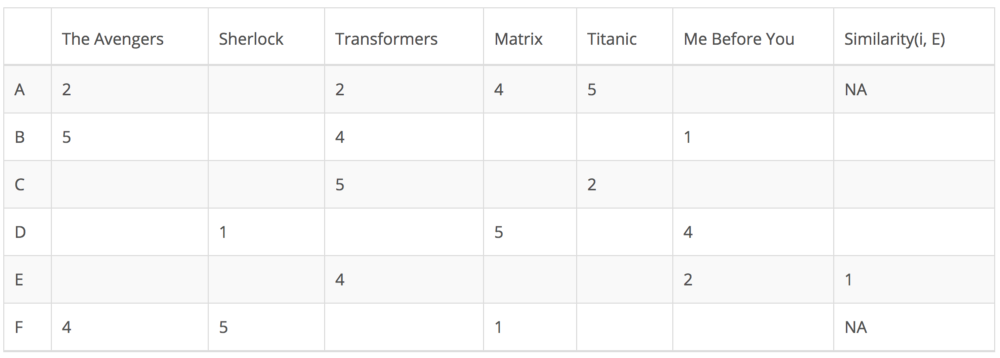


Since user A and F do not share any movie ratings in common with user E....... their similarities with user E are not defined in Pearson Correlation.

 Therefore, we only need to consider user B, C, and D. 
 
 Based on Pearson Correlation, we can compute the following similarity.

 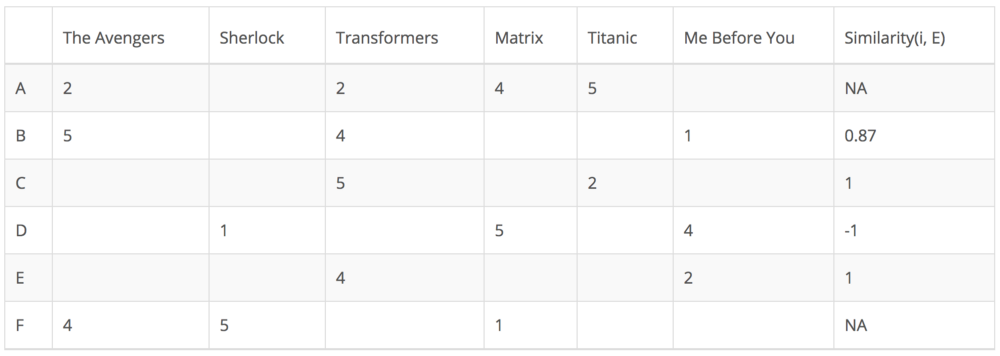

 From the above table we can see that .......user D is very different from user E as the Pearson Correlation between them is negative. 
 
 He rated Me Before You higher than his rating average, while user E did the opposite. 
 
 Now, we can start to fill in the blank for the movies that user E has not rated based on other users.

 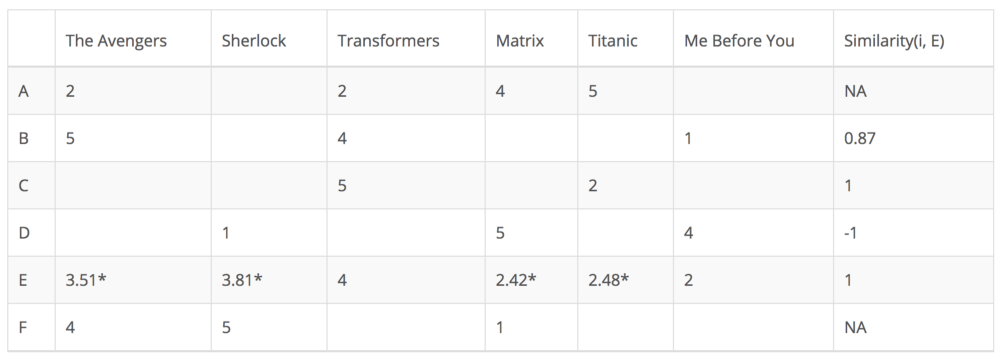

 Although computing user-based CF is very simple, it suffers from several problems.
 
  One main issue is that ......users’ preference can change over time. 
  
  It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. 
  
  To tackle this problem, we can apply item-based CF.

**Item Based Collaborative Filtering** 


 Instead of measuring the similarity between users..... the item-based CF recommends items based on their similarity with the items that the target user rated. 
 
 Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. 
 
 The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. 
 
 The following table shows how to do so for the movie **Me Before You**.

 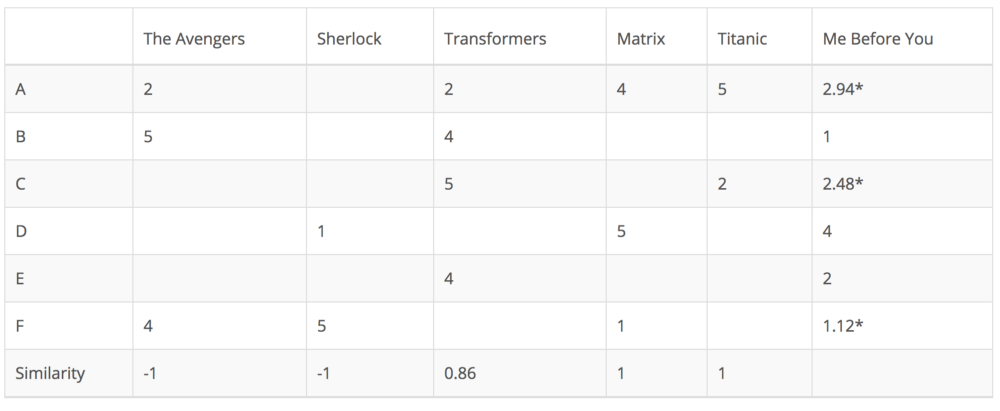

 
It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. 

However, several problems remain for this method.

 First, the main issue is scalability. 
 
 The computation grows with both the customer and the product. 
 
 The worst case complexity is O(mn) with m users and n items. 
 
 In addition, sparsity is another concern. 
 
 Take a look at the above table again. 
 
 Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. 
 
 In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

**Single Value Decomposition**


One way to handle the scalability and sparsity issue created by CF ...... is to leverage a **latent factor model** to capture the similarity between users and items. 

Essentially, we want to turn the recommendation problem into an optimization problem.

 We can view it as ........ how good we are in predicting the rating for items given a user.
 
  One common metric is **Root Mean Square Error (RMSE)**. 
  
  The lower the RMSE, the better the performance.

Now talking about latent factor .........you might be wondering what is it ?

It is a broad idea which describes a property or concept that a user or an item have. 

For instance..... for **music** ....... latent factor can refer to the **genre that the music belongs to**. 

SVD decreases the dimension of the utility matrix .......by extracting its latent factors. 

Essentially, we map each user and each item into a latent space with dimension r. 

Therefore, it helps us better understand the relationship between users and items as they become directly comparable. 

The below figure illustrates this idea.

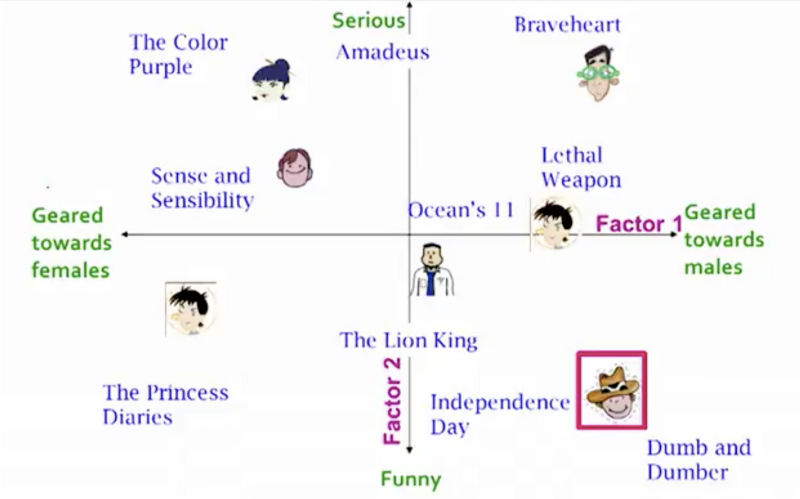




 Let's implement this.
 
  Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset.
  
   We'll be using the Surprise library to implement SVD.

**Surprise**

   Surprise is a Python module that allows you to create and test rate prediction systems.

   Surprise includes a set of estimators (or prediction algorithms) for evaluating predictions. 
   
   Classic techniques, such as the main similarity-based algorithms, as well as matrix factorization algorithms like SVD and NMF, are implemented.

It also includes tools for model evaluation, such as cross-validation iterators and scikit-built-in learned metrics, as well as grid search and randomized search for model selection and automatic hyper-parameter search. 

Users can develop their own recommendation technique with fewer codes.

In [59]:
ratings = pd.read_csv('/content/gdrive/MyDrive/Data/Recommender_System/The_Movies_Dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [60]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [62]:
reader = Reader()

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

svd = SVD()

cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=5 , verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8931  0.8962  0.9028  0.8911  0.8998  0.8966  0.0043  
MAE (testset)     0.6864  0.6906  0.6942  0.6846  0.6959  0.6903  0.0044  
Fit time          3.12    1.58    1.51    1.55    1.73    1.90    0.62    
Test time         0.17    0.35    0.15    0.29    0.15    0.22    0.08    


{'test_rmse': array([0.89314292, 0.8961675 , 0.90282122, 0.89106998, 0.89976341]),
 'test_mae': array([0.68637191, 0.69058076, 0.69417662, 0.68456949, 0.69594544]),
 'fit_time': (3.1171929836273193,
  1.5760140419006348,
  1.505659580230713,
  1.5498859882354736,
  1.727015495300293),
 'test_time': (0.16723346710205078,
  0.34738802909851074,
  0.14987683296203613,
  0.28673839569091797,
  0.14887404441833496)}

We get a mean Root Mean Sqaure Error of 0.8944 which is more than good enough for our case. 

Let us now train on our dataset and arrive at predictions.

In [63]:
trainset = data.build_full_trainset()

svd.fit(trainset)

In [64]:
meta = pd.read_csv('/content/gdrive/MyDrive/Data/Recommender_System/The_Movies_Dataset/movies_metadata.csv')
meta.head(15).T

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
adult,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,NaN,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection', '...",NaN,NaN,"{'id': 117693, 'name': 'Balto Collection', 'po...",NaN,NaN
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,62000000,0,0,44000000,98000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...","[{'id': 10751, 'name': 'Family'}, {'id': 16, '...","[{'id': 36, 'name': 'History'}, {'id': 18, 'na...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.mgm.com/view/movie/757/Goldeneye/,NaN,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,9087,12110,21032,10858,1408
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041,tt0113277,tt0114319,tt0112302,tt0114576,tt0113189,tt0112346,tt0112896,tt0112453,tt0113987,tt0112760
original_language,en,en,en,en,en,en,en,en,en,en,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,The American President,Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,"Widowed U.S. president Andrew Shepherd, one of...",When a lawyer shows up at the vampire's doorst...,An outcast half-wolf risks his life to prevent...,An all-star cast powers this epic look at Amer...,"Morgan Adams and her slave, William Shaw, are ..."


In [65]:
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [66]:
meta["id"] = meta['id'].str.replace('-', '').astype(float)
meta['id'].dtype

dtype('float64')

In [67]:
meta['id'] = meta['id'].astype('int64')
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [68]:
user_rating  =  pd.merge(ratings , meta , left_on='movieId', right_on='id', how='inner')

user_ratings_final =  user_rating[['userId', 'movieId', 'rating','original_title']]

user_ratings  =   user_ratings_final.sort_values(by='userId')

user_ratings.head().sort_values('rating',ascending = False)

,userId,movieId,rating,original_title
0,1,1371,2.5,Rocky III
235,1,2455,2.5,Vivement dimanche!
182,1,2294,2.0,Jay and Silent Bob Strike Back
140,1,2193,2.0,My Tutor
47,1,1405,1.0,Greed


Now we shall be checking for a particular user -  as to what are the ratings he/she has given to the movies watched. 

Based on that ........we shall be trying to predict what will be the rating he/she shall give to a new movie. 

Let us choose User no. 7. 

First lets take a look into the movies he/she has watched.

In [69]:
user_ratings[user_ratings['userId'] == 7].sort_values('rating',ascending = False)

,userId,movieId,rating,original_title
6410,7,318,5.0,The Million Dollar Hotel
8557,7,260,5.0,The 39 Steps
18739,7,745,5.0,The Sixth Sense
457,7,110,5.0,Trois couleurs : Rouge
48,7,1405,5.0,Greed
9707,7,594,4.0,The Terminal
4906,7,551,4.0,The Poseidon Adventure
5558,7,590,4.0,The Hours
8976,7,380,4.0,Rain Man
8345,7,112,4.0,Italiensk for begyndere


**Observations**    
Okay what we see is, the user here has seen multiple movies from the  **thriller** and **horror** genres.

 So in order to test on this particular user, let us choose two movies that he/she did not watch - and accordingly shall predict his/her ratings for the same.

Lets Choose a movie:

Since he has watched multiple horror movies- will give him a horror movie to estimate his ratings. 

Our choice: **The Conjuring**


In [70]:
movie1 = meta['original_title'] == 'The Conjuring'

meta[movie1][['original_title','id']]


,original_title,id
21276,The Conjuring,138843


In [71]:
svd.predict(7, 138843, 3)

Prediction(uid=7, iid=138843, r_ui=3, est=3.3033061482236206, details={'was_impossible': False})

Observations Okay, 3.30 is a mediocre rating.

But if we check the movies listed above, he/she has mostly rated them a 3- so in that order, a 3.30 seems better than those.

 One startling feature of this recommender system is that ......... it doesn't care what the movie is (or what it contains).
 
  It works purely on the basis of an assigned movie ID and tries to predict ratings ....... based on how the other users have predicted the movie.





**Conclusion**


We have created recommender systems using demographic , content- based and collaborative filtering. 

While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. 



